<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/Assignment18_XGBoost_YR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. \
The description of the dataset is as follows:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation','relationship', 'race', 'sex',
              'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
              'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels
df = train_set

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#converting 
print(df.shape)
df.describe()

(32561, 15)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


**As we can see from above descriptions, we do not have any null values in this datset..**

In [ ]:
# data cleaning

In [ ]:
df.replace(' ?',np.nan,inplace=True)

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

**Feature Engineering**

In [ ]:
df.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
df = df.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


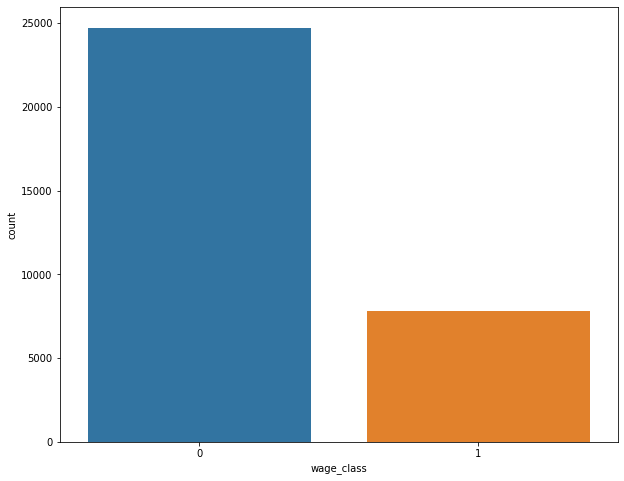

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['wage_class'])
plt.show()

In [ ]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
df = df.replace(' Without-pay', ' Never-worked')

In [ ]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Never-worked'], dtype=object)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: workclass, dtype: int64


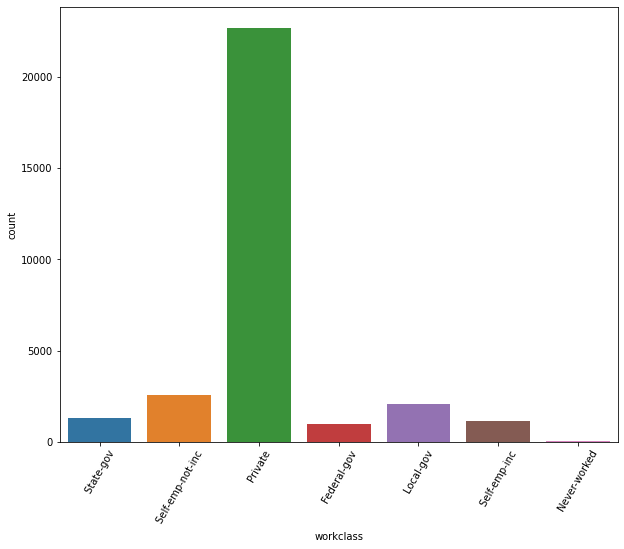

In [ ]:
print(df['workclass'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x = df['workclass'])
plt.xticks(rotation=60)
plt.show()

In [ ]:
df['workclass'].fillna('0',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

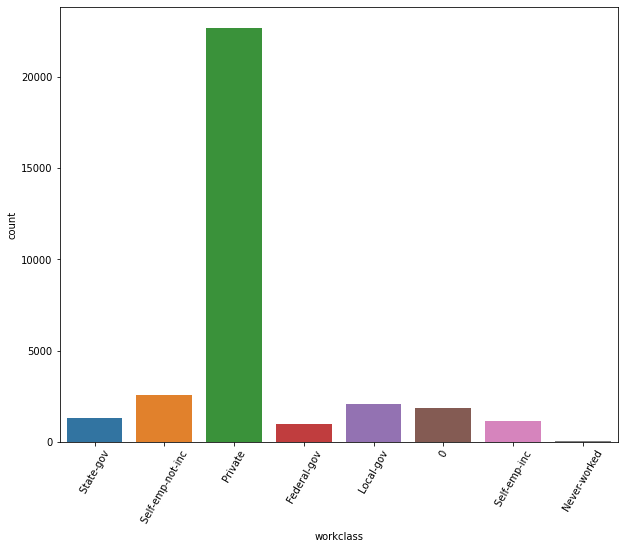

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [ ]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [ ]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

In [ ]:
df['fnlwgt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlwgt, dtype: float64

In [ ]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

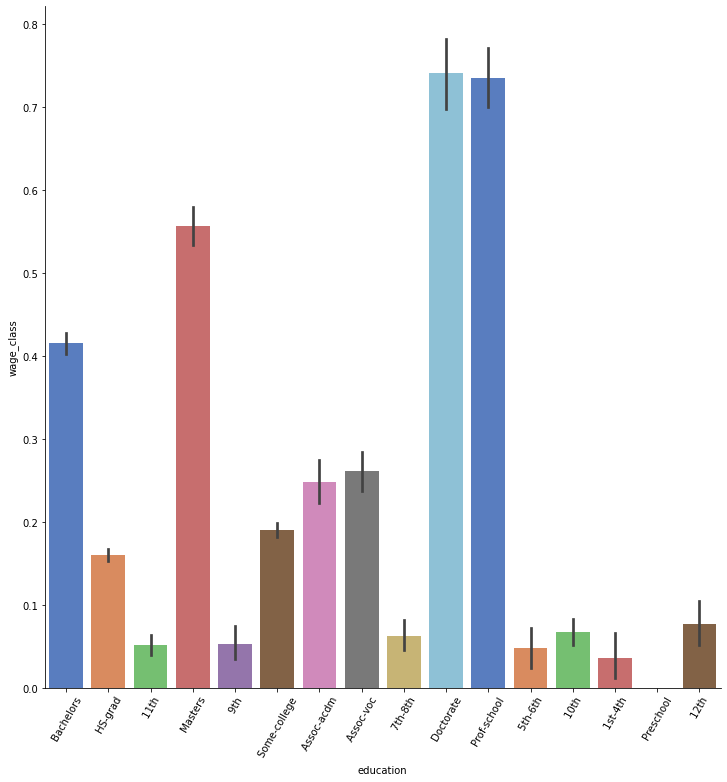

In [ ]:
sns.catplot(x='education',y='wage_class',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)
plt.show()

In [ ]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [ ]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

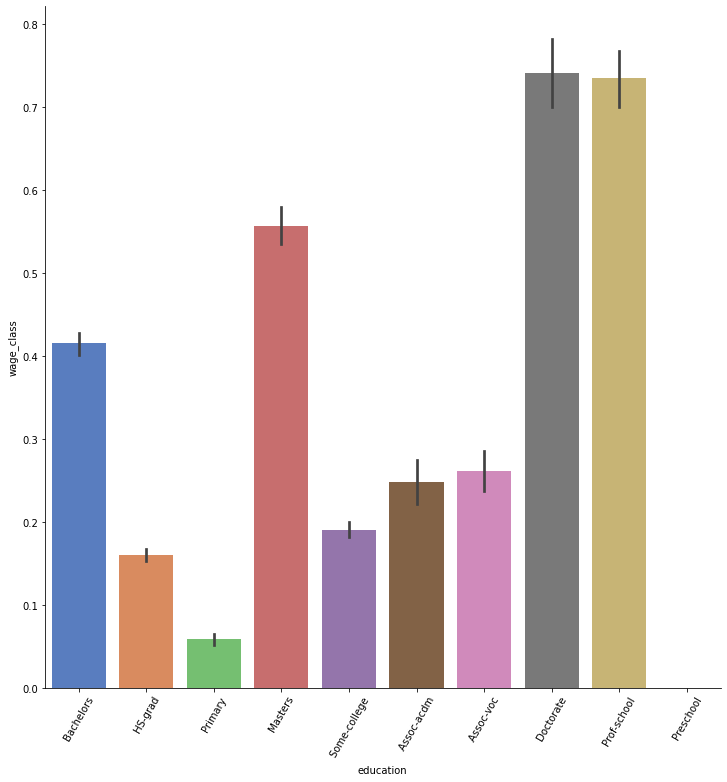

In [ ]:
sns.catplot(x='education',y='wage_class',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [ ]:
df['marital_status'].value_counts()


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [ ]:
df['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

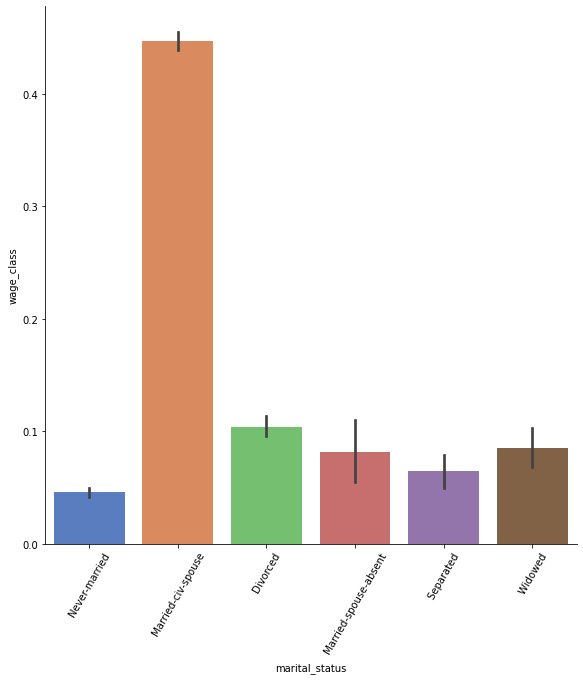

In [ ]:
sns.catplot(x='marital_status',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [ ]:
df['occupation'].fillna('0',inplace=True)

In [ ]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

In [ ]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

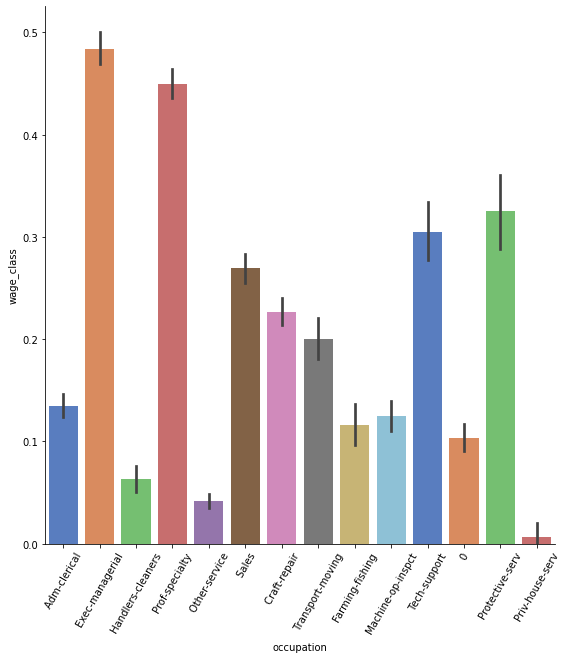

In [ ]:
sns.catplot(x='occupation',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [ ]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [ ]:
df['native_country'] = df['native_country'].apply(native)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

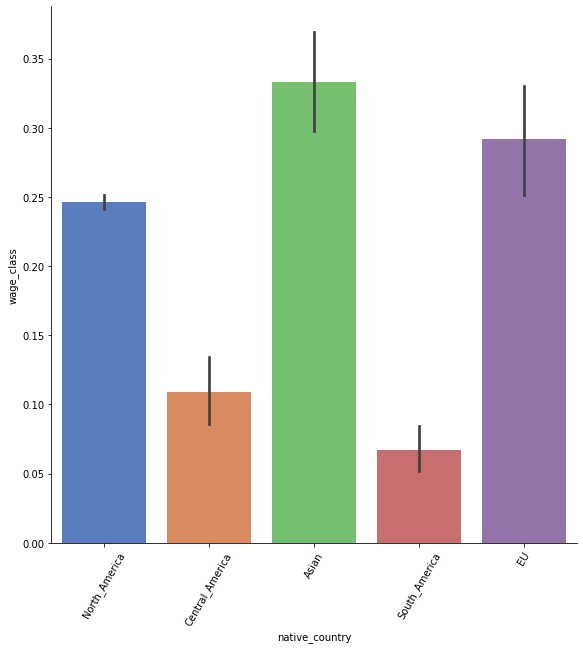

In [ ]:
sns.catplot(x='native_country',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [ ]:
# checking correlations

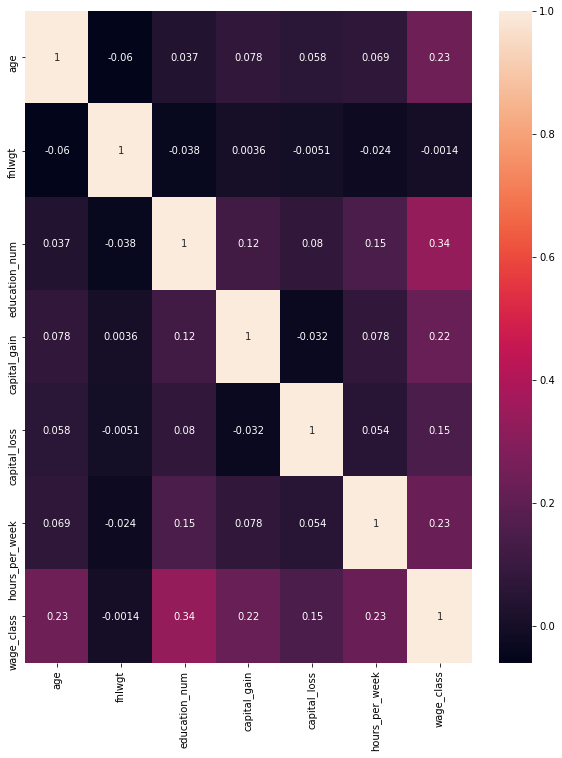

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot=True)

### **Making sure that all the feature eng is applied to test data too**

In [ ]:
test_set.replace(' ?',np.nan,inplace=True)

In [ ]:
test_set = test_set.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})

In [ ]:
test_set = test_set.replace(' Without-pay', ' Never-worked')

In [ ]:
test_set['workclass'].fillna('0',inplace=True)

In [ ]:
test_set['fnlwgt'] = test_set['fnlwgt'].apply(lambda x :np.log1p(x))

In [ ]:
test_set['education'] = test_set['education'].apply(primary)

In [ ]:
test_set['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

In [ ]:
test_set['occupation'].fillna('0',inplace=True)

In [ ]:
test_set['occupation'].replace(' Armed-Forces','0',inplace=True)

In [ ]:
test_set['native_country'] = test_set['native_country'].apply(native)

In [ ]:
train_set = df

In [ ]:
# dividing data into train and test data

In [ ]:
x_train = train_set.drop(columns = ['wage_class'])
y_train = train_set['wage_class']

x_test = test_set.drop(columns = ['wage_class'])
y_test = test_set['wage_class']

In [ ]:
# converting categorical values into numerical values

In [ ]:
xd_train = pd.get_dummies(x_train)
xd_test = pd.get_dummies(x_test)

In [ ]:
# scaling x values using standard scalar

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

xd_train_scaled = scalar.fit_transform(xd_train)
xd_test_scaled = scalar.fit_transform(xd_test)  

In [ ]:
# Setting parameters for GridSearchCV

grid_param = {'learning_rate' : [0.01, 0.001],
              'max_depth' : [3, 5, 10],
              'n_estimators' : [10,50,100,200] }



In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xg_c = XGBClassifier()

grid_search = GridSearchCV(xg_c, 
                           param_grid = grid_param,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = 3,
                           verbose = 3)



In [ ]:
grid_search.fit(xd_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed: 11.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=3,
             param_grid={'learning_rate': [0.01, 0.001],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
           

In [ ]:
# getting best params for XGboost from grid search

grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

In [ ]:
# getting best dcore from xgboost from grid search

grid_search.best_score_

0.8654526894047854

In [ ]:
#Applying best params on XGBoost

xg_c = XGBClassifier(learning_rate= 0.01 ,
                     max_depth= 10,
                     n_estimators= 200)

xg_c.fit(xd_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Evaluating Model

In [ ]:
xg_c.score(xd_test_scaled, y_test)


0.8653645353479515

In [ ]:
y_pred = xg_c.predict(xd_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f'Accuracy Score:\n\n{accuracy_score(y_test,y_pred)}')
print('*'*50)
print(f'Confusion Matrix:\n\n{confusion_matrix(y_test,y_pred)}')
print('*'*50)
print(f'Classification Report:\n\n{classification_report(y_test,y_pred)}')

Accuracy Score:

0.8653645353479515
**************************************************
Confusion Matrix:

[[11818   617]
 [ 1575  2271]]
**************************************************
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.79      0.59      0.67      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.77      0.79     16281
weighted avg       0.86      0.87      0.86     16281



In [ ]:
import pickle

with open('xgboost_model.sav','wb') as f:
  pickle.dump(xg_c, f)